<a href="https://colab.research.google.com/github/Danicoder/Especializacion_IA_BigData/blob/main/practica_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREDICION DEL ALGORITMO

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

In [2]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
    df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
    test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [4]:
from google.colab import files

uploaded = files.upload()

Saving Phishing.csv to Phishing (1).csv


In [5]:
import pandas as pd

df = pd.read_csv('Phishing.csv')
print(df.head(10))

   Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
0            0                   2                12                5.5   
1            0                   3                12                5.0   
2            2                   2                11                4.0   
3            0                   2                 7                4.5   
4           19                   2                10                6.0   
5            0                   2                10                5.5   
6            0                   2                12                4.5   
7            0                   2                11                3.5   
8            0                   2                 9                2.5   
9            0                   2                13                4.5   

   longdomaintokenlen  avgpathtokenlen  tld  charcompvowels  charcompace  \
0                   8         4.083334    2              15            7   
1                  10 

In [6]:
df.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
count,15367.000000,15367.000000,15367.000000,15367.000000,15367.000000,15096.000000,15367.000000,15367.000000,15367.000000,15367.000000,...,15367.000000,15367.000000,15367.000000,15367.000000,15367.000000,15367.000000,13541.000000,15177.000000,15364.000000,15364.000000
mean,3.446021,2.543698,8.477061,5.851956,10.027461,5.289936,2.543698,12.659986,8.398516,1.910913,...,2.120843,1.124618,0.500813,-0.158782,0.721684,0.854232,0.634859,0.682896,0.313617,-0.723793
std,14.151453,0.944938,4.660250,2.064581,5.281090,3.535097,0.944938,8.562206,6.329007,4.657731,...,2.777307,2.570246,2.261013,2.535939,0.049246,0.072641,0.510992,0.502288,0.576910,0.649785
min,0.000000,2.000000,0.000000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.419560,0.561913,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,2.000000,5.000000,4.500000,7.000000,3.800000,2.000000,6.000000,4.000000,0.000000,...,1.000000,0.000000,0.000000,-1.000000,0.687215,0.798231,0.709532,0.707165,0.000000,-1.000000
50%,0.000000,2.000000,8.000000,5.500000,9.000000,4.500000,2.000000,11.000000,7.000000,0.000000,...,2.000000,0.000000,0.000000,-1.000000,0.723217,0.859793,0.785949,0.814038,0.000000,-1.000000
75%,0.000000,3.000000,11.000000,6.666666,12.000000,5.571429,3.000000,17.000000,11.000000,1.000000,...,3.000000,1.000000,0.000000,-1.000000,0.757949,0.916667,0.859582,0.916667,1.000000,-1.000000
max,173.000000,19.000000,68.000000,29.500000,63.000000,105.000000,19.000000,94.000000,62.000000,58.000000,...,24.000000,31.000000,30.000000,29.000000,0.869701,1.000000,0.962479,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15367 entries, 0 to 15366
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      15367 non-null  int64  
 1   domain_token_count               15367 non-null  int64  
 2   path_token_count                 15367 non-null  int64  
 3   avgdomaintokenlen                15367 non-null  float64
 4   longdomaintokenlen               15367 non-null  int64  
 5   avgpathtokenlen                  15096 non-null  float64
 6   tld                              15367 non-null  int64  
 7   charcompvowels                   15367 non-null  int64  
 8   charcompace                      15367 non-null  int64  
 9   ldl_url                          15367 non-null  int64  
 10  ldl_domain                       15367 non-null  int64  
 11  ldl_path                         15367 non-null  int64  
 12  ldl_filename      

In [8]:
df['URL_Type_obf_Type'].value_counts()

,count
URL_Type_obf_Type,
benign,7781
phishing,7586


In [9]:
nulo = df.isna().any()
nulo[nulo]

,0
avgpathtokenlen,True
NumberRate_DirectoryName,True
NumberRate_FileName,True
NumberRate_Extension,True
NumberRate_AfterPath,True
Entropy_DirectoryName,True
Entropy_Filename,True
Entropy_Extension,True
Entropy_Afterpath,True


In [10]:
infinito = df.isin([np.inf, -np.inf]).any()
infinito[infinito]

,0
argPathRatio,True


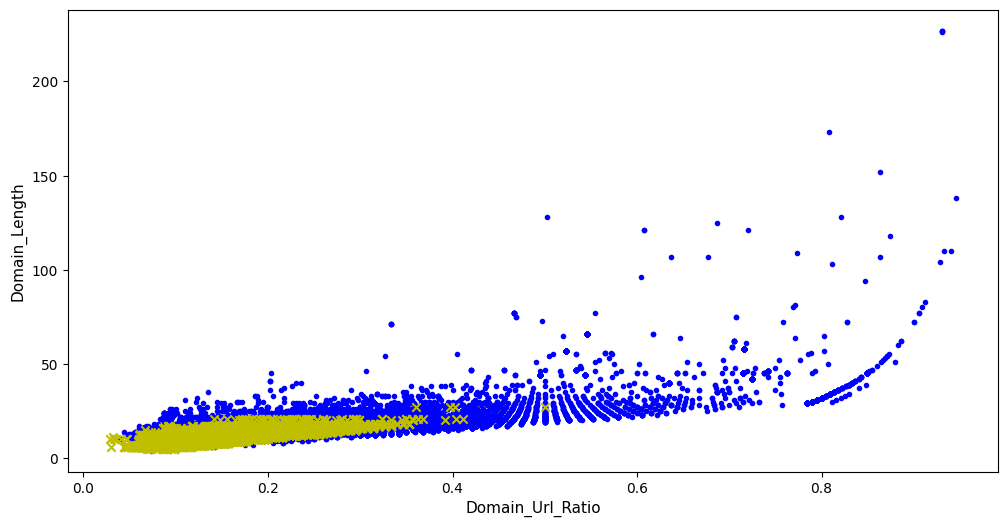

In [11]:
plt.figure(figsize=(12, 6))
plt.scatter(df["domainUrlRatio"][df['URL_Type_obf_Type'] ==
"phishing"], df["domainlength"][df['URL_Type_obf_Type'] ==
"phishing"], c="b", marker=".")
plt.scatter(df["domainUrlRatio"][df['URL_Type_obf_Type'] ==
"benign"], df["domainlength"][df['URL_Type_obf_Type'] ==
"benign"], c="y", marker="x")
plt.xlabel("Domain_Url_Ratio", fontsize=11)
plt.ylabel("Domain_Length", fontsize=11)
plt.show()

In [12]:
X = df.drop(columns=['URL_Type_obf_Type'])
y = df['URL_Type_obf_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42,stratify=df['URL_Type_obf_Type'])

In [13]:
# Dividir en conjunto de entrenamiento (60%) y conjunto de prueba (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Dividir el conjunto temporal (X_temp) en conjunto de validación (50%) y conjunto de prueba (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Imprimir longitudes de los conjuntos

print(f"Longitud entrenamiento X: {len(y_train)}")
print(f"Longitud validación X: {len(y_val)}")
print(f"Longitud prueba X: {len(y_test)}")

Longitud entrenamiento X: 9220
Longitud validación X: 3073
Longitud prueba X: 3074


In [14]:
X_train = X_train.drop("argPathRatio", axis=1)

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [16]:
X_train_prep = imputer.fit_transform(X_train)

In [17]:
X_train_prep = pd.DataFrame(X_train_prep, columns=X_train.columns,index=y_train.index)

In [18]:
print(X_val.head())

       Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
3967             0                   2                14           5.000000   
10787            0                   3                 2           8.666667   
3526             0                   2                14           5.000000   
1418            12                   2                 8           4.500000   
10339            0                   2                 9           7.000000   

       longdomaintokenlen  avgpathtokenlen  tld  charcompvowels  charcompace  \
3967                    7         4.714286    2              31           16   
10787                  16        16.000000    3               3            5   
3526                    7         3.928571    2              19           14   
1418                    6         4.000000    2              11            6   
10339                  11         3.333333    2              24           14   

       ldl_url  ...  SymbolCount_Directoryna

In [19]:
# Alinear las columnas de X_val con las columnas de X_train
X_val = X_val[X_train.columns]


In [20]:
X_val_prep = imputer.transform(X_val)

In [21]:
X_val_prep = pd.DataFrame(X_val_prep, columns=X_val.columns)

In [22]:
X_val_reducido = X_val_prep[["domainUrlRatio", "domainlength"]].copy()
print(X_val_reducido.head())

   domainUrlRatio  domainlength
0        0.112245          11.0
1        0.405797          28.0
2        0.126437          11.0
3        0.172414          10.0
4        0.200000          15.0


In [23]:
X_train_prep.head(10)

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
570,0.0,2.0,19.0,6.000000,9.0,3.578947,2.0,25.0,10.0,0.0,...,2.0,0.0,0.0,-1.0,0.627704,0.901158,0.874007,0.580732,0.000000,-1.000000
4920,0.0,2.0,9.0,7.000000,11.0,4.888889,2.0,16.0,10.0,1.0,...,-1.0,0.0,0.0,-1.0,0.724117,0.897617,0.785551,0.738505,0.000000,-1.000000
1398,0.0,3.0,5.0,2.666667,3.0,7.600000,3.0,16.0,8.0,0.0,...,2.0,0.0,0.0,-1.0,0.722813,0.796658,0.831852,0.818353,0.000000,-1.000000
7550,7.0,2.0,6.0,8.500000,13.0,4.333334,2.0,5.0,4.0,0.0,...,-1.0,5.0,4.0,3.0,0.769400,0.803422,0.785551,0.853880,0.866748,0.897617
7483,62.0,2.0,14.0,5.500000,8.0,13.500000,2.0,30.0,23.0,8.0,...,1.0,11.0,10.0,9.0,0.706907,0.860529,0.789690,0.739481,0.731490,0.744536
12737,0.0,3.0,4.0,3.666667,6.0,6.500000,3.0,10.0,7.0,0.0,...,1.0,0.0,0.0,-1.0,0.756800,0.776432,0.939794,0.792408,0.000000,-1.000000
5241,0.0,2.0,11.0,5.000000,7.0,4.000000,2.0,16.0,12.0,0.0,...,4.0,0.0,0.0,-1.0,0.687865,0.947443,0.679391,0.871049,0.000000,-1.000000
4039,0.0,2.0,13.0,4.500000,6.0,4.076923,2.0,16.0,10.0,0.0,...,2.0,0.0,0.0,-1.0,0.710283,0.939794,0.803599,0.720426,0.000000,-1.000000
4165,0.0,2.0,10.0,2.500000,3.0,5.400000,2.0,18.0,10.0,0.0,...,1.0,0.0,0.0,-1.0,0.715432,1.000000,0.833333,0.668395,0.000000,-1.000000
11798,0.0,3.0,2.0,13.333333,20.0,3.500000,3.0,3.0,3.0,3.0,...,-1.0,0.0,0.0,-1.0,0.752066,0.795721,0.785551,0.898227,0.000000,-1.000000


In [24]:
# Comprobar si hay valores nulos en el conjunto de entrenamiento X_train
nulos_X_train = X_train_prep.isnull().sum()
nulos_X_train

,0
Querylength,0
domain_token_count,0
path_token_count,0
avgdomaintokenlen,0
longdomaintokenlen,0
...,...
Entropy_Domain,0
Entropy_DirectoryName,0
Entropy_Filename,0
Entropy_Extension,0


In [25]:
print(type(X_train))  # Esto debería ser <class 'pandas.core.frame.DataFrame'>
print(type(X_val))  # Lo mismo aquí

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [26]:
X_train_reducido = X_train_prep[["domainUrlRatio", "domainlength"]].copy()
X_val_reducido = X_val_prep[["domainUrlRatio", "domainlength"]].copy()

In [27]:
X_train_reducido

,domainUrlRatio,domainlength
570,0.122642,13.0
4920,0.202703,15.0
1398,0.166667,10.0
7550,0.321429,18.0
7483,0.082759,12.0
...,...,...
1210,0.205882,14.0
2542,0.123711,12.0
5081,0.250000,15.0
2758,0.253731,17.0


In [28]:
from sklearn.svm import SVC

In [29]:
svm_clf = SVC(kernel="linear", C=70)
svm_clf.fit(X_train_reducido, y_train)

SVC(C=70, kernel='linear')

In [30]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180,
    facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

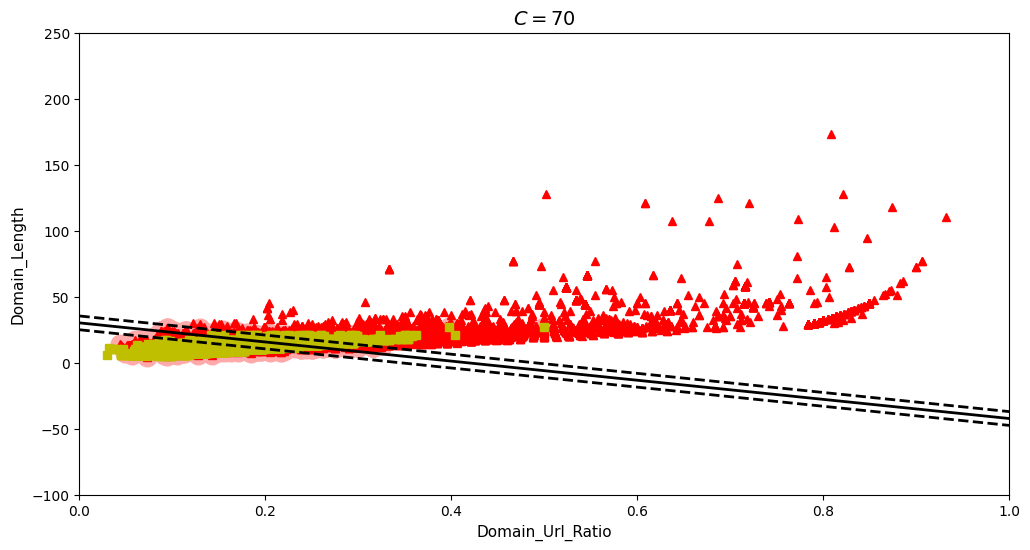

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(X_train_reducido.values[:, 0][y_train=="phishing"],
X_train_reducido.values[:, 1][y_train=="phishing"], "r^")
plt.plot(X_train_reducido.values[:, 0][y_train=="benign"],
X_train_reducido.values[:, 1][y_train=="benign"], "ys")
plot_svc_decision_boundary(svm_clf, 0, 1)
plt.title("$C = {}$".format(svm_clf.C), fontsize=14)
plt.axis([0, 1, -100, 250])
plt.xlabel("Domain_Url_Ratio", fontsize=11)
plt.ylabel("Domain_Length", fontsize=11)
plt.show()

#PREDICCION DEL ALGORITMO

In [32]:
y_pred = svm_clf.predict(X_val_reducido)

In [33]:
print("F1 Score:", f1_score(y_pred, y_val, pos_label='phishing'))

F1 Score: 0.8288288288288288


In [34]:
svm_clf_sc = Pipeline([
("scaler", RobustScaler()),
("linear_svc", SVC(kernel="linear", C=70)),
])
svm_clf_sc.fit(X_train_reducido, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('linear_svc', SVC(C=70, kernel='linear'))])

In [35]:
y_pred = svm_clf_sc.predict(X_val_reducido)
print("F1 Score:", f1_score(y_pred, y_val, pos_label='phishing'))

F1 Score: 0.832996632996633


In [36]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=1)

In [ ]:
svm_clf.fit(X_train_prep, y_train)

In [ ]:
y_pred = svm_clf.predict(X_val_prep)
print("F1 Score:", f1_score(y_pred, y_val, pos_label='phishing'))

##SVM: KERNEL NO LINEAL

In [ ]:
y_train_num = y_train.factorize()[0]
y_val_num = y_val.factorize()[0]

In [ ]:
from sklearn.datasets import make_moons
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=20, loss="hinge", random_state=42,
max_iter=100000))
])
polynomial_svm_clf.fit(X_train_reduced, y_train_num)

In [ ]:
def plot_dataset(X, y):
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g.")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.")
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)
    plt.sca(axes[0])
    plot_dataset(X_train_reducido.values, y_train_num)
    plot_predictions(polynomial_svm_clf, [0, 1, -100, 250])
    plt.xlabel("Domain_Url_Ratio", fontsize=11)
    plt.ylabel("Domain_Length", fontsize=11)
    plt.sca(axes[1])
    plot_predictions(polynomial_svm_clf, [0, 1, -100, 250])
    plt.xlabel("Domain_Url_Ratio", fontsize=11)
    plt.ylabel("Domain_length", fontsize=11)
    plt.show()

In [ ]:
y_pred = polynomial_svm_clf.predict(X_val_reducido)
print("F1 Score:", f1_score(y_pred, y_val_num))

In [ ]:
svm_clf = SVC(kernel="poly", degree=3, coef0=10, C=20)
svm_clf.fit(X_train_reducido, y_train_num)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)
plt.sca(axes[0])
plot_dataset(X_train_reducido.values, y_train_num)
plot_predictions(svm_clf, [0, 1, -100, 250])
plt.xlabel("Domain_Url_Ratio", fontsize=11)
plt.ylabel("Domain_Length", fontsize=11)
plt.sca(axes[1])
plot_predictions(svm_clf, [0, 1, -100, 250])
plt.xlabel("Domain_Url_Ratio", fontsize=11)
plt.ylabel("Domain_Length", fontsize=11)
plt.show()

In [ ]:
y_pred = svm_clf.predict(X_val_reducido)
print("F1 Score:", f1_score(y_pred, y_val_num))

In [ ]:
svm_clf = SVC(kernel="poly", degree=3, coef0=10, C=40)
svm_clf.fit(X_train_prep, y_train_num)

##KERNEL: GUASSIAN

In [ ]:
y_pred = svm_clf.predict(X_val_prep)
print("F1 Score:", f1_score(y_pred, y_val_num))

In [ ]:
rbf_kernel_svm_clf = Pipeline([
("scaler", RobustScaler()),
("svm_clf", SVC(kernel="rbf", gamma=0.5, C=1000))
])
rbf_kernel_svm_clf.fit(X_train_reduced, y_train_num)

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)
plt.sca(axes[0])
plot_dataset(X_train_reducido.values, y_train_num)
plot_predictions(rbf_kernel_svm_clf, [0, 1, -100, 250])
plt.xlabel("Domain_Url_Ratio", fontsize=11)
plt.ylabel("Domain_Length", fontsize=11)
plt.sca(axes[1])
plot_predictions(rbf_kernel_svm_clf, [0, 1, -100, 250])
plt.xlabel("Domain_Url_Ratio", fontsize=11)
plt.ylabel("Domain_Length", fontsize=11)
plt.show()

In [ ]:
y_pred = rbf_kernel_svm_clf.predict(X_val_reducido)
print("F1 Score:", f1_score(y_pred, y_val_num))

In [ ]:
rbf_kernel_svm_clf = Pipeline([
("scaler", RobustScaler()),
("svm_clf", SVC(kernel="rbf", gamma=0.05, C=1000))
])
rbf_kernel_svm_clf.fit(X_train_prep, y_train_num)

In [ ]:
y_pred = rbf_kernel_svm_clf.predict(X_val_prep)
print("F1 Score:", f1_score(y_pred, y_val_num))